In [1]:
import numpy as np
print(np.__version__)

1.24.3


In [2]:
import pandas as pd
print(pd.__version__)

2.0.3


In [ ]:
import matplotlib as pit 
print(pit.__version__)

In [ ]:
import sklearn   
print(sklearn.__version__)

1.3.2


In [ ]:
import tensorflow as tf 
print(tf.__version__)

2.13.0


In [ ]:
import seaborn
print(seaborn.__version__)

0.13.2


In [ ]:
import torch 
torch.cuda.is_available()

True

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error

file_path= "C:\\Users\\user\\Downloads\\boston.csv"
df= pd.read_csv(file_path)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
df.shape

(506, 14)

In [27]:
X = df.drop(["MEDV","B"],axis = 1).values
y = df['MEDV'].values

In [28]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 42)

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred = lin_reg.predict(X_test)

In [33]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print("Liner Regression 평과결과")
print("MSE",mse)
print("RMSE",rmse)
print("MAE",mae)

Liner Regression 평과결과
MSE 22.77770856386608
RMSE 4.772599769922687
MAE 3.1113773882381794


In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
accuracy_score,
precision_score,
recall_score,
f1_score,
confusion_matrix,
classification_report)

In [39]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['target'] = iris.target

In [40]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
df.shape

(150, 5)

In [46]:
X = df.drop(['target'], axis=1).values
y = df['target'].values

In [43]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [50]:
y_pred = log_reg.predict(X_test)

In [51]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [52]:
print("Logistic Regression 평가결과")
print("Accuracy :", acc)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)

Logistic Regression 평가결과
Accuracy : 0.9
Precision: 0.9023569023569025
Recall   : 0.9
F1-score : 0.8997493734335841


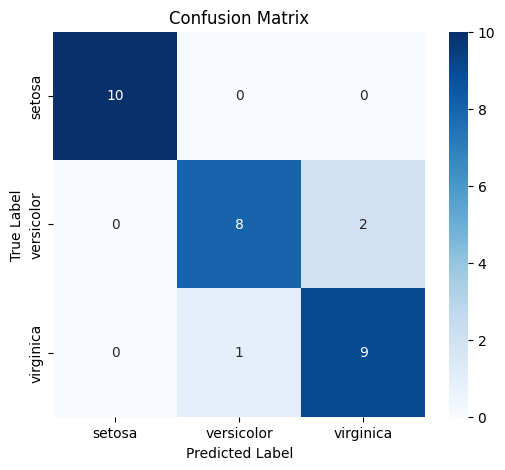

In [53]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm,annot = True,fmt = 'd',cmap = "Blues",xticklabels = iris.target_names,yticklabels=iris.target_names )
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()